<a href="https://colab.research.google.com/github/YhBedoya/OnlineShoppersIntentionTesinaMML/blob/main/OnlineShoppersIntentionDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

np.random.seed(5)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science and Engineering - PoliTo2/2nd Semester/Mathematics in Machine Learning/Tesina/online_shoppers_intention.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data exploration

In [ ]:
df["OperatingSystems"] = df["OperatingSystems"].astype("string")
df["Browser"] = df["Browser"].astype("string")
df["Region"] = df["Region"].astype("string")
df["TrafficType"] = df["TrafficType"].astype("string")
df["VisitorType"] = df["VisitorType"].astype("string")
df["Weekend"] = df["Weekend"].astype("string")
df["Month"] = df["Month"].astype("string")
df["Revenue"] = df["Revenue"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  string  
 11  OperatingSystems         12330 non-null  string  
 12  Browser                  12330 non-null  string  
 13  Region                   12330 non-null  string  
 14  Traffi

In [ ]:
df[["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Revenue"]].describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


False    10422
True      1908
Name: Revenue, dtype: int64

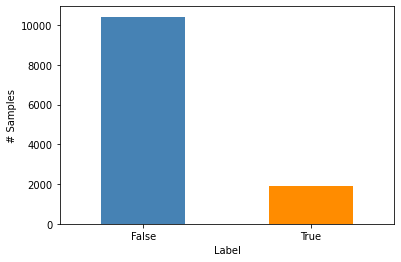

In [ ]:
df_balance = df["Revenue"].value_counts()
df_balance.plot.bar(color=["steelblue", "darkorange"])
plt.ylabel("# Samples")
plt.xlabel("Label")
plt.xticks(rotation=0)
df_balance

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
months = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12"
}

df["Month"] = df["Month"].map(months)

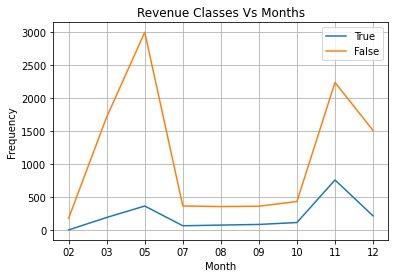

In [ ]:
df_revenue = df.groupby(["Revenue", "Month"]).size()
df_true = df_revenue[True]
df_false = df_revenue[False]
df_month = pd.DataFrame([df_true, df_false]).T.rename(columns={0:"True", 1:"False"})
lines = df_month.plot.line()
plt.ylabel("Frequency")
plt.title("Revenue Classes Vs Months")
plt.grid(True)

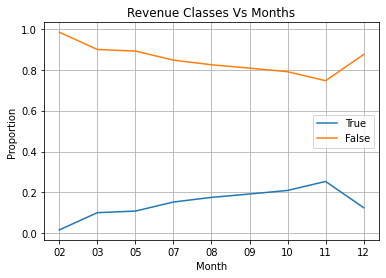

In [ ]:
df_revenue = df.groupby(["Revenue", "Month"]).size()
df_totalMonth = df.groupby(["Month"]).size()
df_true = df_revenue[True]/df_totalMonth
df_false = df_revenue[False]/df_totalMonth
df_month = pd.DataFrame([df_true, df_false]).T.rename(columns={0:"True", 1:"False"})
lines = df_month.plot.line()
plt.ylabel("Proportion")
plt.title("Revenue Classes Vs Months")
plt.grid(True)

In [ ]:
def comparativeBoxplotbyRevenue(df, column2):
  column1= "Revenue"
  df_comparison = df[[column1, column2]]
  order = [True, False]
  sns.boxplot(x=column1, y=column2, data=df_comparison, order=order)

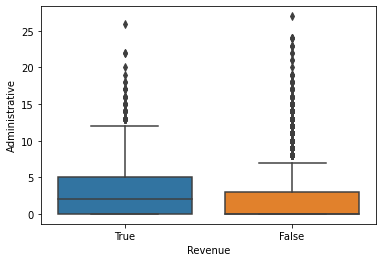

In [ ]:
comparativeBoxplotbyRevenue(df, "Administrative")

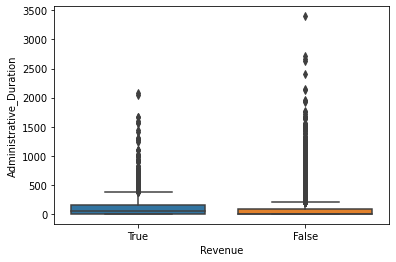

In [ ]:
comparativeBoxplotbyRevenue(df, "Administrative_Duration")

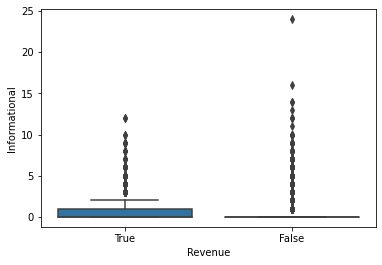

In [ ]:
comparativeBoxplotbyRevenue(df, "Informational")

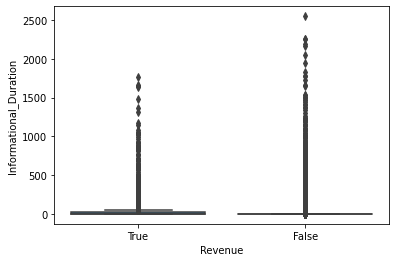

In [ ]:
comparativeBoxplotbyRevenue(df, "Informational_Duration")

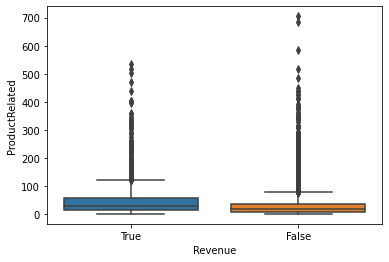

In [ ]:
comparativeBoxplotbyRevenue(df, "ProductRelated")

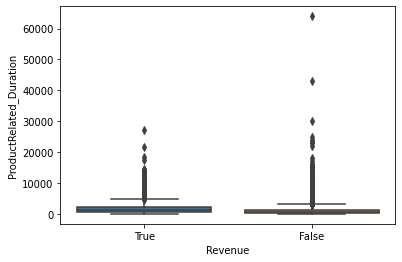

In [ ]:
comparativeBoxplotbyRevenue(df, "ProductRelated_Duration")

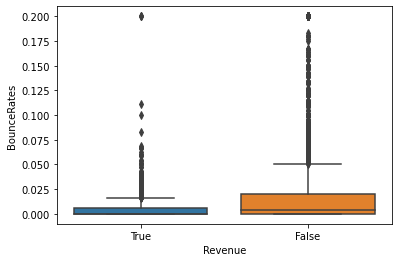

In [ ]:
comparativeBoxplotbyRevenue(df, "BounceRates")

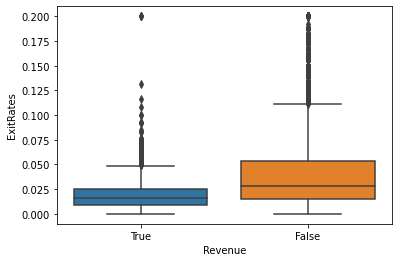

In [ ]:
comparativeBoxplotbyRevenue(df, "ExitRates")

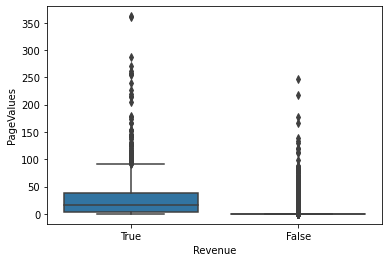

In [ ]:
comparativeBoxplotbyRevenue(df, "PageValues")

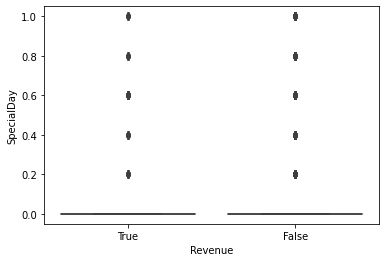

In [ ]:
comparativeBoxplotbyRevenue(df, "SpecialDay")

In [ ]:
def barPlotComparison(df, column2):
  column1 = "Revenue"
  df_revenue = df.groupby([column1, column2]).size()
  df_true = df_revenue[True]
  df_false = df_revenue[False]
  df_optSystem = pd.DataFrame([df_true, df_false]).T.rename(columns={0:"True", 1:"False"})
  lines = df_optSystem.plot.bar()
  plt.ylabel("Frequency")
  plt.title("Comparison Revenues Vs OptSystems")
  plt.grid(True)
  plt.xticks(rotation=0)

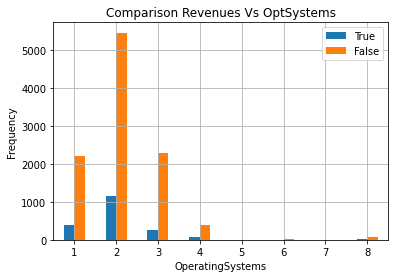

In [ ]:
barPlotComparison(df, "OperatingSystems")

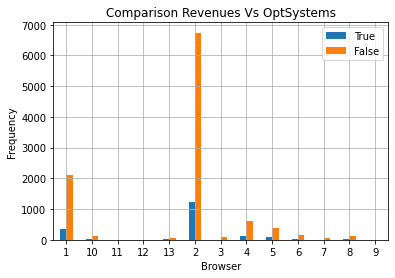

In [ ]:
barPlotComparison(df, "Browser")

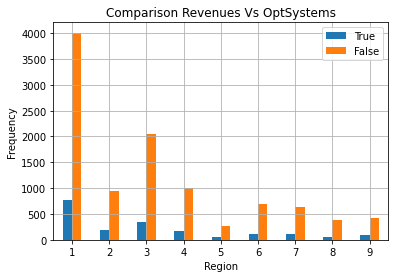

In [ ]:
barPlotComparison(df, "Region")

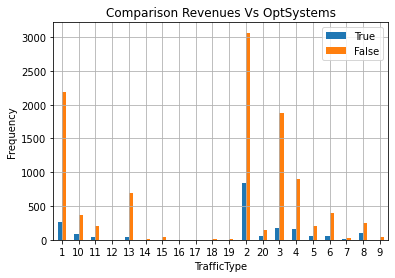

In [ ]:
barPlotComparison(df, "TrafficType")

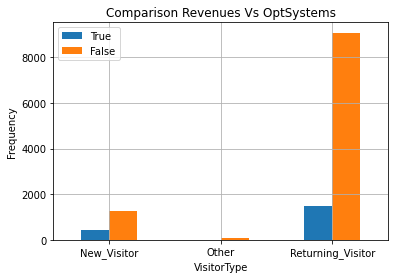

In [ ]:
barPlotComparison(df, "VisitorType")

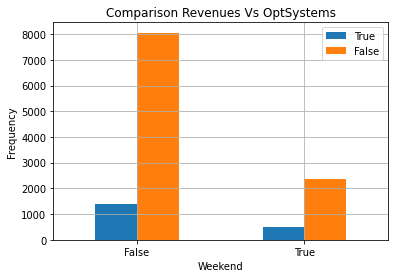

In [ ]:
barPlotComparison(df, "Weekend")

In [ ]:
def barPlotComparisonProp(df, column2):
  column1 = "Revenue"
  df_revenue = df.groupby([column1, column2]).size()
  df_true = df_revenue[True]
  df_false = df_revenue[False]
  df_optSystem = pd.DataFrame([df_true, df_false]).T.rename(columns={0:"True", 1:"False"})
  df_optSystem["Proportion"] = df_optSystem["True"]/df_optSystem.sum(axis=1)
  lines = df_optSystem["Proportion"].plot.bar(color=["steelblue"])
  plt.ylabel("Proportion of True Transactions")
  plt.title("Proportion of True {} in {} categories".format(column1, column2))
  plt.grid(True)
  plt.xticks(rotation=0)

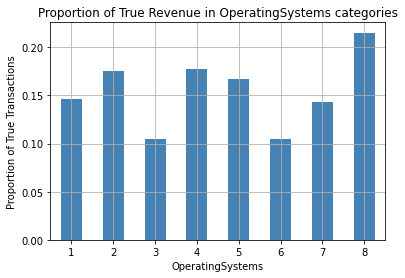

In [ ]:
barPlotComparisonProp(df, "OperatingSystems")

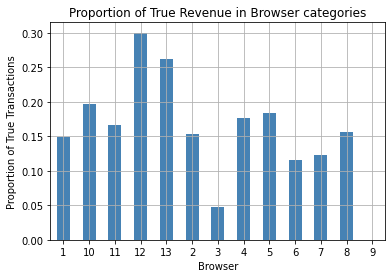

In [ ]:
barPlotComparisonProp(df, "Browser")

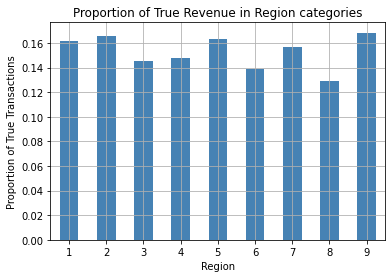

In [ ]:
barPlotComparisonProp(df, "Region")

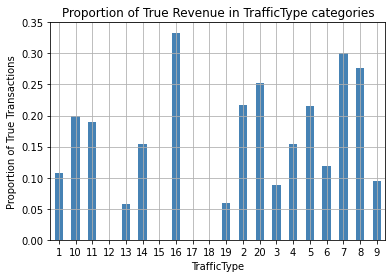

In [ ]:
barPlotComparisonProp(df, "TrafficType")

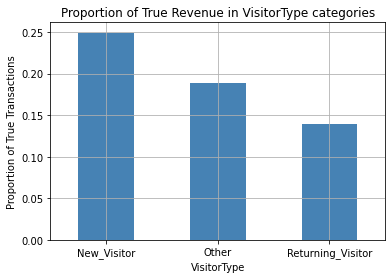

In [ ]:
barPlotComparisonProp(df, "VisitorType")

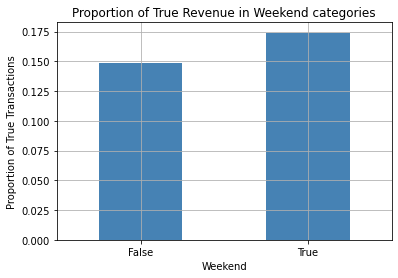

In [ ]:
barPlotComparisonProp(df, "Weekend")

In [ ]:
numericalAttributes = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", 
                   "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]

categoricalAttributes = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Revenue"]

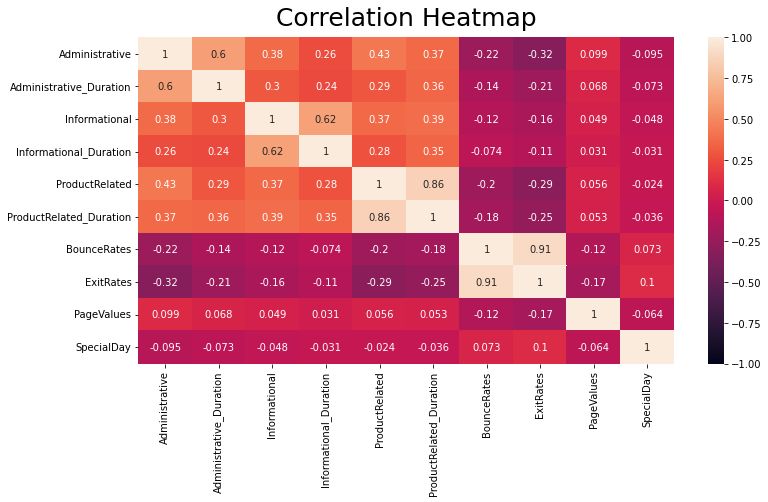

In [ ]:
def corrHeatmap(df, numericalAttributes):
  df_numerical = df[numericalAttributes]
  # Increase the size of the heatmap.
  plt.figure(figsize=(12, 6))
  # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
  # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
  heatmap = sns.heatmap(df_numerical.corr(), vmin=-1, vmax=1, annot=True)
  #Title
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=12);

corrHeatmap(df,numericalAttributes)

# Data preparation

## Data encoding

In [ ]:
df_cat = df[categoricalAttributes].copy()

booleanMap = {"False": 0,
              "True": 1}

df_cat["OperatingSystems"] = df_cat["OperatingSystems"].astype("category")
df_cat["Browser"] = df_cat["Browser"].astype("category")
df_cat["Region"] = df_cat["Region"].astype("category")
df_cat["TrafficType"] = df_cat["TrafficType"].astype("category")
df_cat["VisitorType"] = df_cat["VisitorType"].astype("category")
df_cat["Weekend"] = df_cat["Weekend"].map(booleanMap)
df_cat["Month"] = df_cat["Month"].astype("category")
df_cat["Revenue"] = df_cat["Revenue"].astype('int32')

df_encoded = pd.get_dummies(df_cat)
df_encoded.reset_index(inplace=True)
df_encoded.drop("index", axis=1, inplace=True)

In [ ]:
df_numerical = df[numericalAttributes].copy()
df_numerical.reset_index(inplace=True)
df_numerical.drop("index", axis=1, inplace=True)

X_set = pd.merge(df_encoded, df_numerical, left_index=True, right_index=True)
y_set = X_set.pop("Revenue").to_numpy()
X_set = X_set.to_numpy()

## Outliers analysis

### Mahalanobis Distance outliers detection

In [ ]:
def MahalanobisOutlierDetection(df, target):
  ##https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3

  df_num = df#.to_numpy()
  # Covariance matrix
  covariance  = np.cov(df_num , rowvar=False)

  # Covariance matrix power of -1
  covariance_pm1 = np.linalg.matrix_power(covariance, -1)

  # Center point
  centerpoint = np.mean(df_num , axis=0)

  # Distances between center point and 
  distances = []
  for i, val in enumerate(df_num):
        p1 = val
        p2 = centerpoint
        distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
        distances.append(distance)
  distances = np.array(distances)

  # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
  cutoff = chi2.ppf(0.01, df_num.shape[1])

  # Index of outliers
  outlierIndexes = np.where(distances > cutoff )

  outliers = df[outlierIndexes[0]]
  print(f"Total outlier points {len(outliers)}")

  X = np.delete(df, outlierIndexes[0], 0)
  y = np.delete(target, outlierIndexes[0], 0)

  return X, y

In [ ]:
newX, newy = MahalanobisOutlierDetection(X_set, y_set)

Total outlier points 5022


### Isolation forest outliers detection

In [ ]:
from sklearn.ensemble import IsolationForest

def isolationForestOutlierDetection(df, target):
  clf = IsolationForest(n_estimators = 100, random_state=44)
  is_outliers = clf.fit_predict(df)
  X = df[is_outliers==1]
  y = target[is_outliers==1]

  print(f"Total outliers {df.shape[0] - X.shape[0]}")

  return X, y

In [ ]:
newX, newy =  isolationForestOutlierDetection(X_set, y_set)

Total outliers 95


## Data standardization

In [ ]:
##https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

X_train, X_test, y_train, y_test = train_test_split(newX, newy, test_size = 0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((9176, 73), (3059, 73))

## SMOTE resampling

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape, y_res.shape

((15588, 73), (15588,))

In [ ]:
unique, counts = np.unique(y_res, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 7794]
 [   1 7794]]


## PCA overview

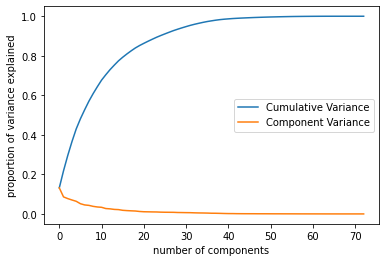

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('proportion of variance explained');
plt.legend(['Cumulative Variance', 'Component Variance'])

In [ ]:
components = 0
accum = 0
for i in pca.explained_variance_ratio_:
  components += 1
  accum += i
  if accum >=0.95:
    print(f"{components} components explain the {np.round(accum*100, 2)}% of the variability")
    break

32 components explain the 95.39% of the variability


#### Pipeline definition

Each one of the used algorithms are going to be join in a pipeline with a PCA analysis, a Gridsearch to find the best combination of parameters and a cross-validation algorithm.


In [ ]:
def fitModel(classifier, X, y, X_test, y_test ,parameterSearch):
  # Define a pipeline to search for the best combination of PCA truncation
  # and classifier regularization.
  pca = PCA()

  # set the tolerance to a large value to make the example faster
  model = classifier
  pipe = Pipeline(steps=[("pca", pca), ("model", model)])

  #X_digits, y_digits = datasets.load_digits(return_X_y=True)
  # Parameters of pipelines can be set using ‘__’ separated parameter names:
  pca_params = {
      "pca__n_components": [5, 10, 15, 20, 25, 30, 45, 60, 65, 70]}

  param_grid = dict(pca_params, **parameterSearch)

  search = GridSearchCV(pipe, param_grid, n_jobs=5, scoring = 'accuracy')
  search.fit(X, y)
  print("Best parameter (CV score=%0.3f):" % search.best_score_)
  print(search.best_params_)

  # Plot the PCA spectrum
  pca.fit(X)

  fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
  ax0.plot(
      np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
  )
  ax0.set_ylabel("PCA explained variance ratio")

  ax0.axvline(
      search.best_estimator_.named_steps["pca"].n_components,
      linestyle=":",
      label="n_components chosen",
  )
  ax0.legend(prop=dict(size=12))

  # For each number of components, find the best classifier results
  results = pd.DataFrame(search.cv_results_)
  components_col = "param_pca__n_components"
  best_clfs = results.groupby(components_col).apply(
      lambda g: g.nlargest(1, "mean_test_score")
  )

  best_clfs.plot(
      x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
  )
  ax1.set_ylabel("Classification accuracy (val)")
  ax1.set_xlabel("n_components")

  plt.xlim(-1, 70)

  plt.tight_layout()
  plt.show()

  y_pred = search.predict(X_test)

  plot_confusion_matrix(search, X_test, y_test)
  plt.show()

  scores =precision_recall_fscore_support(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)

  print(f"Precision 0: {scores[0][0]}, Precision 1: {scores[0][1]}")
  print(f"recall 0: {scores[1][0]}, recall 1: {scores[1][1]}")
  print(f"fscore 0: {scores[2][0]}, fscore 1: {scores[2][1]}")
  print(f"accuracy: {acc}")

# Classification models

## Logistic regression

Best parameter (CV score=0.886):
{'model__C': 1000, 'model__class_weight': {0: 1, 1: 3}, 'pca__n_components': 70}


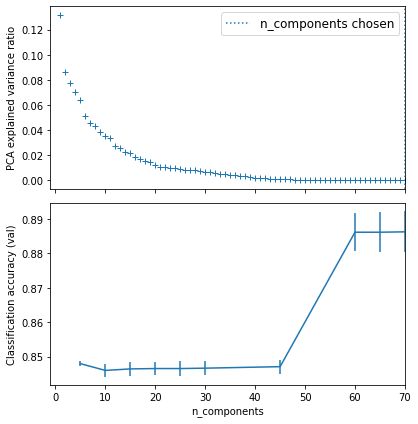

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


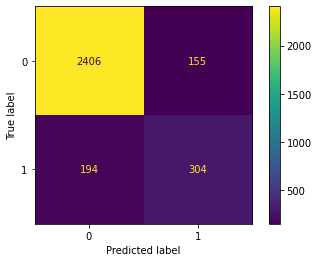

Precision 0: 0.9253846153846154, Precision 1: 0.6623093681917211
recall 0: 0.9394767668879344, recall 1: 0.6104417670682731
fscore 0: 0.9323774462313504, fscore 1: 0.6353187042842215
accuracy: 0.8859104282445244


In [ ]:
logistic = LogisticRegression(max_iter=10000, tol=0.01)

param_grid = {
    "model__C": [0.001, 0.1, 1, 10, 1000],
    "model__class_weight":[{0:1,1:3}, {0:1,1:4}, {0:1,1:5}, {0:1,1:6}],
}

fitModel(logistic, X_train, y_train, X_test, y_test, param_grid)

## Decision Tree Classifier

Best parameter (CV score=0.847):
{'model__class_weight': {0: 1, 1: 4}, 'model__criterion': 'gini', 'model__max_features': None, 'model__min_samples_split': 2, 'pca__n_components': 60}


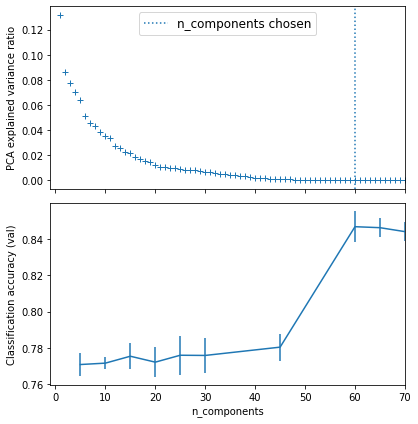

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


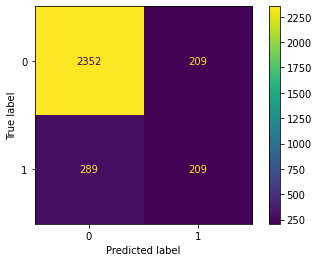

Precision 0: 0.8905717531238168, Precision 1: 0.5
recall 0: 0.9183912534166341, recall 1: 0.41967871485943775
fscore 0: 0.9042675893886967, fscore 1: 0.45633187772925765
accuracy: 0.8372016999019287


In [ ]:
tree = DecisionTreeClassifier()

param_grid = {
    "model__class_weight":[{0:1,1:3}, {0:1,1:4}, {0:1,1:5}, {0:1,1:6}],
    "model__criterion": ["gini", "entropy"],
    "model__min_samples_split": [2, 5, 7],
    "model__max_features": [None, "sqrt"]
}

fitModel(tree, X_train, y_train, X_test, y_test, param_grid)

## Random forest classifier

Best parameter (CV score=0.893):
{'model__class_weight': {0: 1, 1: 4}, 'model__criterion': 'entropy', 'model__max_features': None, 'pca__n_components': 70}


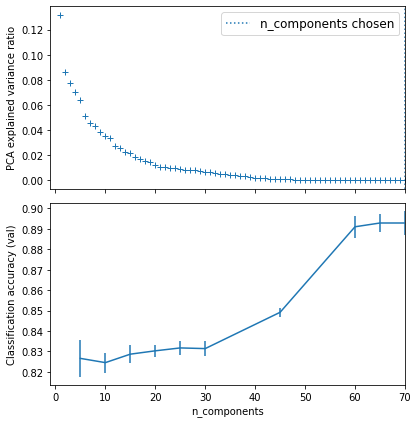

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


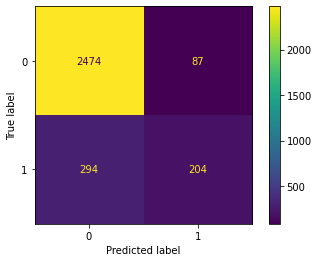

Precision 0: 0.8937861271676301, Precision 1: 0.7010309278350515
recall 0: 0.9660288949629051, recall 1: 0.40963855421686746
fscore 0: 0.9285044098329893, fscore 1: 0.5171102661596958
accuracy: 0.8754494932984636


In [ ]:
rfc = RandomForestClassifier()

param_grid = {
    "model__class_weight":[{0:1,1:4}, {0:1,1:5}, {0:1,1:6}],
    "model__criterion": ["gini", "entropy"],
    "model__max_features": [None, "sqrt"]
}

fitModel(rfc, X_train, y_train, X_test, y_test, param_grid)

## Support vector classifier

Best parameter (CV score=0.889):
{'model__C': 10, 'model__class_weight': {0: 1, 1: 4}, 'model__kernel': 'linear', 'pca__n_components': 60}


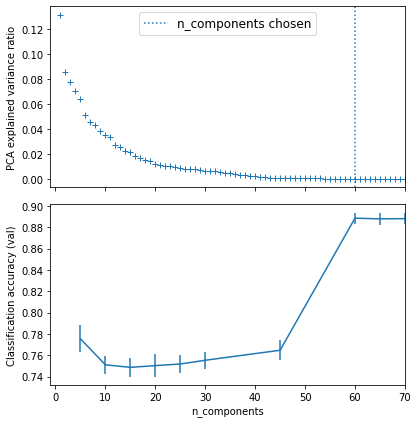

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


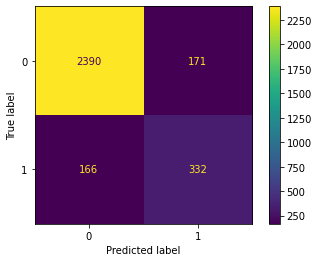

Precision 0: 0.935054773082942, Precision 1: 0.6600397614314115
recall 0: 0.9332292073408824, recall 1: 0.6666666666666666
fscore 0: 0.934141098299785, fscore 1: 0.6633366633366633
accuracy: 0.8898332788492972


In [ ]:
svc = SVC()

param_grid = {
    "model__C": [0.1, 1, 10],
    "model__class_weight":[{0:1,1:4}, {0:1,1:5}, {0:1,1:6}],
    "model__kernel": ["linear", "poly", "rbf", "sigmoid"]
}

fitModel(svc, X_train, y_train, X_test, y_test, param_grid)